In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [6]:
X2[:5,:]

array([[ 1.        , -0.23405626,  0.05478233],
       [ 1.        ,  1.85834312,  3.45343917],
       [ 1.        ,  0.79434931,  0.63099083],
       [ 1.        , -1.18483129,  1.4038252 ],
       [ 1.        , -2.0947269 ,  4.38788078]])

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
y_predict2 = lin_reg2.predict(X2)

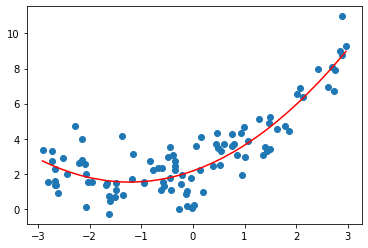

In [8]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')
plt.show()

In [9]:
lin_reg2.coef_

array([0.        , 1.04007396, 0.42430336])

In [10]:
lin_reg2.intercept_

2.1712957590519855

# 关于PolynomialFeatures

In [11]:
X = np.arange(1,11).reshape(-1,2)

In [12]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [14]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [15]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

![](degree为3的例子.png)

# pipeline

In [16]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

In [17]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
poly_reg = Pipeline([
    ("ploy",PolynomialFeatures(degree=2)),
    ("std_scalar",StandardScaler()),
    ("lin_reg",LinearRegression())
])

In [18]:
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

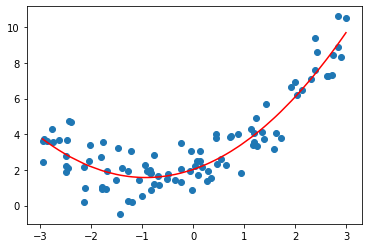

In [19]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()